# Stock Price Movement Prediction (S&P 500)

This project predicts whether the **S&P 500 index will go up or down tomorrow** using machine learning.  
We compare **Logistic Regression** (baseline) and **Random Forest** (ensemble model).  

---

## Step 1: Install & Import Libraries


In [2]:
!pip install yfinance

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, classification_report
import yfinance as yf


## Step 2: Load Historical S&P 500 Data


In [3]:
sp500 = yf.Ticker("^GSPC")
sp500 = sp500.history(period="max")
sp500 = sp500.loc["1990-01-01":].copy()
sp500.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,0.0,0.0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,0.0,0.0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,0.0,0.0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,0.0,0.0
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,0.0,0.0


## Step 3: Feature Engineering


In [4]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

predictors = ["Close", "Volume", "Open", "High", "Low"]


## Step 4: Helper Functions (Prediction & Backtesting)


In [5]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index)
    return pd.DataFrame({"Predictions": preds, "Target": test["Target"]})

def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    for i in range(start, data.shape[0], step):
        train = data.iloc[:i].copy()
        test = data.iloc[i:(i+step)].copy()
        preds = predict(train, test, predictors, model)
        all_predictions.append(preds)
    return pd.concat(all_predictions)


## Step 5: Logistic Regression (Baseline)


In [6]:
log_reg = LogisticRegression(max_iter=1000)
log_reg_predictions = backtest(sp500, log_reg, predictors)

print("Logistic Regression Results:")
print(classification_report(log_reg_predictions["Target"], log_reg_predictions["Predictions"]))


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.48      0.08      0.14      3006
           1       0.54      0.92      0.68      3482

    accuracy                           0.53      6488
   macro avg       0.51      0.50      0.41      6488
weighted avg       0.51      0.53      0.43      6488



## Step 6: Random Forest (Ensemble Model)


In [7]:
rf_model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)
rf_predictions = backtest(sp500, rf_model, predictors)

print("Random Forest Results:")
print(classification_report(rf_predictions["Target"], rf_predictions["Predictions"]))


Random Forest Results:
              precision    recall  f1-score   support

           0       0.46      0.60      0.52      3006
           1       0.53      0.39      0.45      3482

    accuracy                           0.49      6488
   macro avg       0.50      0.50      0.49      6488
weighted avg       0.50      0.49      0.48      6488



## Step 7: Model Comparison


In [10]:
log_reg_precision = precision_score(log_reg_predictions["Target"], log_reg_predictions["Predictions"])
rf_precision = precision_score(rf_predictions["Target"], rf_predictions["Predictions"])

print("Model Comparison:")
print(f"Logistic Regression Precision: {log_reg_precision:.4f}")
print(f"Random Forest Precision: {rf_precision:.4f}")


Model Comparison:
Logistic Regression Precision: 0.5382
Random Forest Precision: 0.5310


## Step 8: Visualization (Actual vs Predicted)


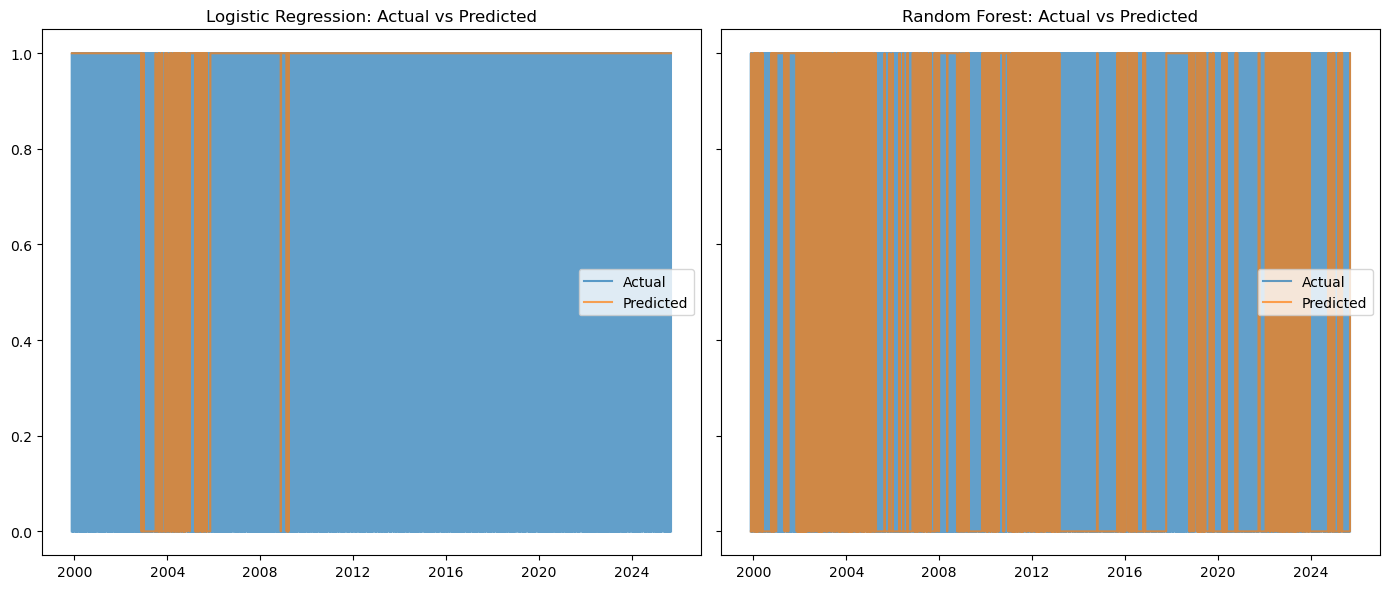

In [11]:
# Align results for plotting
log_reg_results = log_reg_predictions[["Target", "Predictions"]].copy()
rf_results = rf_predictions[["Target", "Predictions"]].copy()

fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=True)

# Logistic Regression
axes[0].plot(log_reg_results.index, log_reg_results["Target"], label="Actual", alpha=0.7)
axes[0].plot(log_reg_results.index, log_reg_results["Predictions"], label="Predicted", alpha=0.7)
axes[0].set_title("Logistic Regression: Actual vs Predicted")
axes[0].legend()

# Random Forest
axes[1].plot(rf_results.index, rf_results["Target"], label="Actual", alpha=0.7)
axes[1].plot(rf_results.index, rf_results["Predictions"], label="Predicted", alpha=0.7)
axes[1].set_title("Random Forest: Actual vs Predicted")
axes[1].legend()

plt.tight_layout()
plt.show()


## Step 9: Conclusion & Next Steps

- Logistic Regression provides a **baseline model**.  
- Random Forest improves performance with higher precision.  
- Visual comparison shows Random Forest follows the actual trend better.  

🔮 **Future Improvements:**
- Add more features (moving averages, RSI, etc.).  
- Try deep learning models (LSTMs, GRUs).  
- Apply to individual stocks (AAPL, TSLA, etc.).  
